In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sys
import os
import joblib
pd.set_option('display.float_format', '{:.4f}'.format)


In [2]:
results = pd.read_csv ('../database/csvki_dla_modelu/emotions_dataset.csv', sep = ',')
results

,game_id,student_id,happy,angry,sad,time
0,1,81,1,1,0,12.8800
1,2,85,1,0,0,13.7000
2,3,38,0,1,0,12.3200
3,4,16,0,1,0,16.5000
4,5,41,1,0,0,17.6500
...,...,...,...,...,...,...
1025,1026,101,1,1,1,25.0400
1026,1027,102,1,0,0,15.1200
1027,1028,103,0,0,0,16.4700
1028,1029,103,1,0,1,13.5900


In [18]:
happy = np.random.binomial(1,0.85, size = 1000)
angry = np.random.binomial(1,0.1, size = 1000)
sad = np.random.binomial(1,0.1, size = 1000)

game_id = np.array(np.arange(1,1001,1))
student_id = np.random.uniform(1,101,size = 1000)
student_id = student_id.astype('int')
time = np.random.normal(14,3, size = 1000)

df = pd.DataFrame({
    'game_id': game_id,
    'student_id': student_id,
    'happy': happy,
    'angry': angry,
    'sad':sad,
    'time': time
})
df
#df.to_csv('../database/csvki/shapes_dataset.csv', sep = ',')

,game_id,student_id,happy,angry,sad,time
0,1,81,1,1,0,12.8757
1,2,85,1,0,0,13.6966
2,3,38,0,1,0,12.3244
3,4,16,0,1,0,16.4998
4,5,41,1,0,0,17.6535
...,...,...,...,...,...,...
995,996,76,1,0,0,10.2605
996,997,28,1,0,1,19.6774
997,998,80,1,0,0,13.4126
998,999,31,1,0,0,13.5464


In [24]:
happy = np.random.binomial(1,0.8, size = 30)
angry = np.random.binomial(1,0.3, size = 30)
sad = np.random.binomial(1,0.3, size = 30)

game_id = np.array(np.arange(1001,1031,1))
student_id = np.random.uniform(101,105,size = 30)
student_id = student_id.astype('int')

i = np.random.uniform(0,2,size=30)
i = i.astype('int')

time = (1-i)* np.random.normal(14,3, size = 30) + i * np.random.normal(15,6, size = 30)
df2 = pd.DataFrame({
    'game_id': game_id,
    'student_id': student_id,
    'happy': happy,
    'angry': angry,
    'sad':sad,
    'time': time
})
df2

,game_id,student_id,happy,angry,sad,time
0,1001,101,1,0,0,18.2819
1,1002,103,1,0,0,14.2309
2,1003,101,1,0,0,12.6213
3,1004,102,0,1,0,11.9641
4,1005,104,1,0,1,13.4303
5,1006,103,1,0,0,16.5203
6,1007,103,1,0,0,23.4305
7,1008,102,1,1,1,14.7667
8,1009,103,1,0,0,17.8154
9,1010,102,1,1,1,15.8975


In [26]:
results = pd.concat([df,df2])
results

,game_id,student_id,happy,angry,sad,time
0,1,81,1,1,0,12.8757
1,2,85,1,0,0,13.6966
2,3,38,0,1,0,12.3244
3,4,16,0,1,0,16.4998
4,5,41,1,0,0,17.6535
...,...,...,...,...,...,...
25,1026,101,1,1,1,25.0405
26,1027,102,1,0,0,15.1245
27,1028,103,0,0,0,16.4681
28,1029,103,1,0,1,13.5909


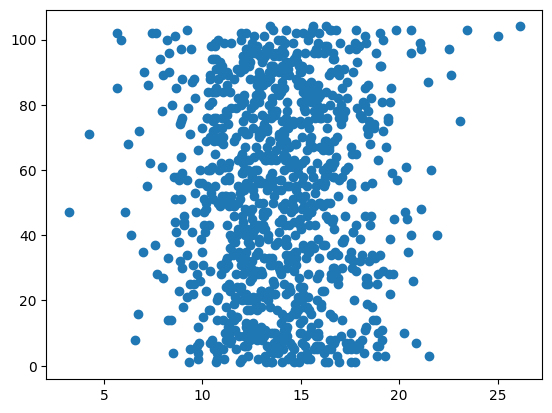

In [3]:
plt.scatter(results.iloc[:,5],results.iloc[:,1])

In [4]:
X = results.loc[:,['happy','angry','sad','time']]
X

,happy,angry,sad,time
0,1,1,0,12.8800
1,1,0,0,13.7000
2,0,1,0,12.3200
3,0,1,0,16.5000
4,1,0,0,17.6500
...,...,...,...,...
1025,1,1,1,25.0400
1026,1,0,0,15.1200
1027,0,0,0,16.4700
1028,1,0,1,13.5900


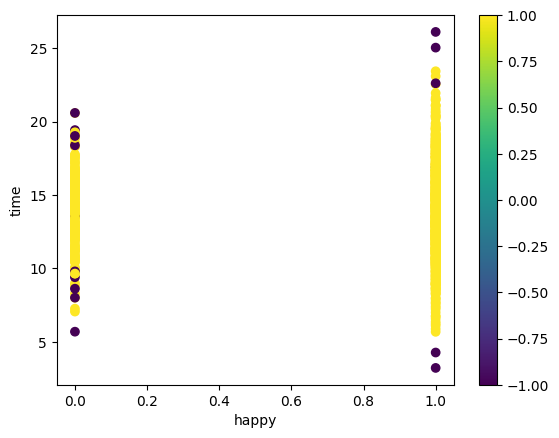

In [5]:
from sklearn.ensemble import IsolationForest
y = IsolationForest(random_state=0, contamination=0.015 ).fit_predict(X)

%matplotlib inline
#-1 outliers
plt.scatter(X.iloc[:,0],X.iloc[:,-1], c = y)
plt.xlabel('happy')
plt.ylabel('time')
plt.colorbar()
plt.show()

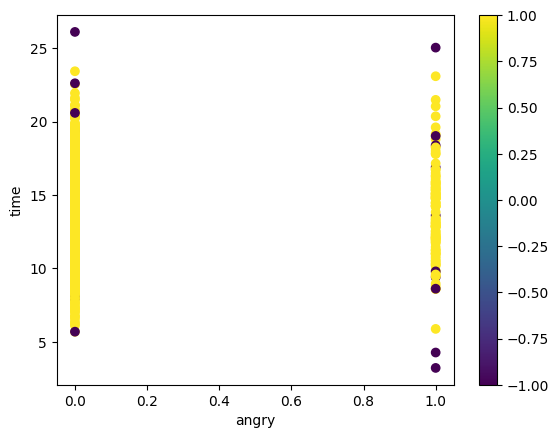

In [6]:
from sklearn.ensemble import IsolationForest
y = IsolationForest(random_state=0, contamination=0.015 ).fit_predict(X)

%matplotlib inline
#-1 outliers
plt.scatter(X.iloc[:,1],X.iloc[:,-1], c = y)
plt.xlabel('angry')
plt.ylabel('time')
plt.colorbar()
plt.show()

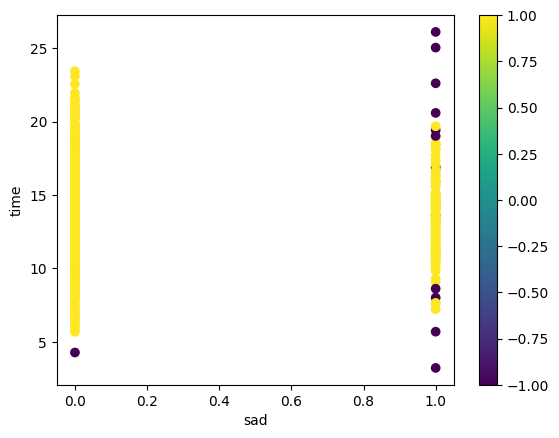

In [7]:
from sklearn.ensemble import IsolationForest
y = IsolationForest(random_state=0, contamination=0.015 ).fit_predict(X)

%matplotlib inline
#-1 outliers
plt.scatter(X.iloc[:,2],X.iloc[:,-1], c = y)
plt.xlabel('sad')
plt.ylabel('time')
plt.colorbar()
plt.show()

In [8]:
model = IsolationForest(random_state=0, contamination=0.015)
model.fit(X)
y = model.predict(X)


In [9]:
results = results.reset_index()
results = results.iloc[:,1:]

In [57]:
results['time'] = results['time'].map(lambda x: f"{x:.2f}")
results

,game_id,student_id,happy,angry,sad,time
0,1,81,1,1,0,12.88
1,2,85,1,0,0,13.70
2,3,38,0,1,0,12.32
3,4,16,0,1,0,16.50
4,5,41,1,0,0,17.65
...,...,...,...,...,...,...
1025,1026,101,1,1,1,25.04
1026,1027,102,1,0,0,15.12
1027,1028,103,0,0,0,16.47
1028,1029,103,1,0,1,13.59


In [58]:
results.to_csv('../database/csvki_dla_modelu/emotions_dataset.csv', sep = ',', index = False)

In [12]:
joblib.dump(model, 'Emotions.joblib')


['Emotions.joblib']